# Feature Selection using Factor Analysis

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

### Import libraries

In [8]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### load, explore and pre-process data

In [9]:
cancer_df = pd.read_csv('datasets/cancer.csv')

In [10]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
cancer_df.shape

(569, 31)

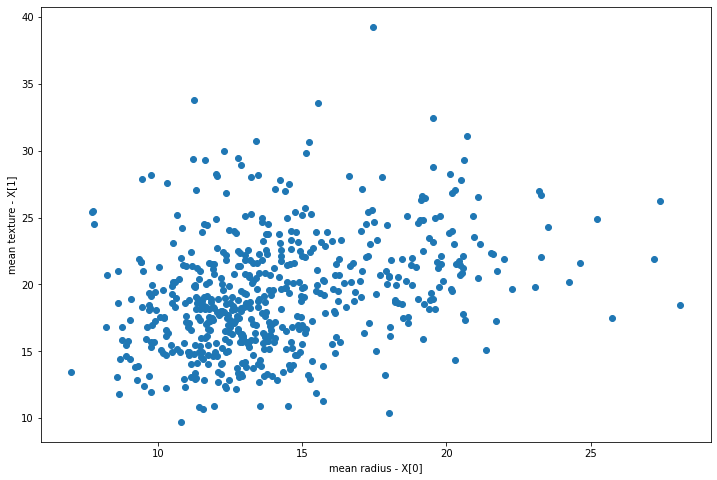

In [12]:
figure = plt.figure(figsize = (12, 8))

plt.scatter(cancer_df.iloc[:,0], cancer_df.iloc[:,1], cmap = 'Spectral')

plt.xlabel('mean radius - X[0]')
plt.ylabel('mean texture - X[1]');

In [13]:
FEATURES = list(cancer_df.columns[:-1])

FEATURES

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

## Build Model


In [14]:
def build_model(name_of_y_col, 
                names_of_x_cols, 
                dataset,
                *hyperparameters):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    fa_obj, X = do_factor_analysis(X, Y, *hyperparameters)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    model = logistic_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    pred_results = pd.DataFrame({'y_test' : y_test,
                                 'y_pred' : y_pred})

    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
  

    return {'fact_a_obj' : fa_obj,
            'transform_x' : X,
            'accuracy': acc, 
            'precision' : prec,
            'recall' : recall,
            'confusion_matrix' : model_crosstab }    

In [15]:
def compare_results(result_dict):
    
    for key in result_dict:
        print('Test: ', key)

        print()
        print("accuracy_score : ", result_dict[key]['accuracy'])
        print("precision_score : ", result_dict[key]['precision'])
        print("recall_score : ", result_dict[key]['recall'])
       
        print()

In [16]:
def visualize_results(result_dict):
    
    n_components = list(range(0, 30))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    precision = [result_dict[key]['precision'] for key in result_dict]
    recall = [result_dict[key]['recall'] for key in result_dict]

    plt.figure(figsize = (12, 10))
    plt.plot(n_components, acc, label='Accuracy')
    plt.plot(n_components, precision, label='Precision')
    plt.plot(n_components, recall, label='Recall')

    pylab.ylim([0.7, 1.2])

    plt.xlabel('n components')
    plt.ylabel('score');
    
    plt.legend()

In [17]:
def logistic_fn(x_train, y_train):
    
    model = LogisticRegression(solver = 'liblinear', max_iter=10000)
    model.fit(x_train, y_train)
    
    return model

In [18]:
from sklearn.decomposition import FactorAnalysis

def do_factor_analysis(x, y, n):
    
    fact_a = FactorAnalysis(n_components = n, random_state = 10, max_iter=10000)
    x_new = fact_a.fit_transform(x, y)
        
    return fact_a, pd.DataFrame(x_new)

In [19]:
result_dict = {}
    
for i in range (1, 31):
    result_dict['n_components - ' + str(i)] = build_model('class',
                                                           FEATURES,
                                                           cancer_df,
                                                           i)

In [20]:
compare_results(result_dict)

Test:  n_components - 1

accuracy_score :  0.9122807017543859
precision_score :  0.9113924050632911
recall_score :  0.96

Test:  n_components - 2

accuracy_score :  0.9473684210526315
precision_score :  0.9240506329113924
recall_score :  1.0

Test:  n_components - 3

accuracy_score :  0.9122807017543859
precision_score :  0.9130434782608695
recall_score :  0.9402985074626866

Test:  n_components - 4

accuracy_score :  0.9736842105263158
precision_score :  0.9859154929577465
recall_score :  0.9722222222222222

Test:  n_components - 5

accuracy_score :  0.9473684210526315
precision_score :  0.9315068493150684
recall_score :  0.9855072463768116

Test:  n_components - 6

accuracy_score :  0.956140350877193
precision_score :  0.9705882352941176
recall_score :  0.9565217391304348

Test:  n_components - 7

accuracy_score :  0.9649122807017544
precision_score :  0.9863013698630136
recall_score :  0.96

Test:  n_components - 8

accuracy_score :  0.9736842105263158
precision_score :  0.973333333

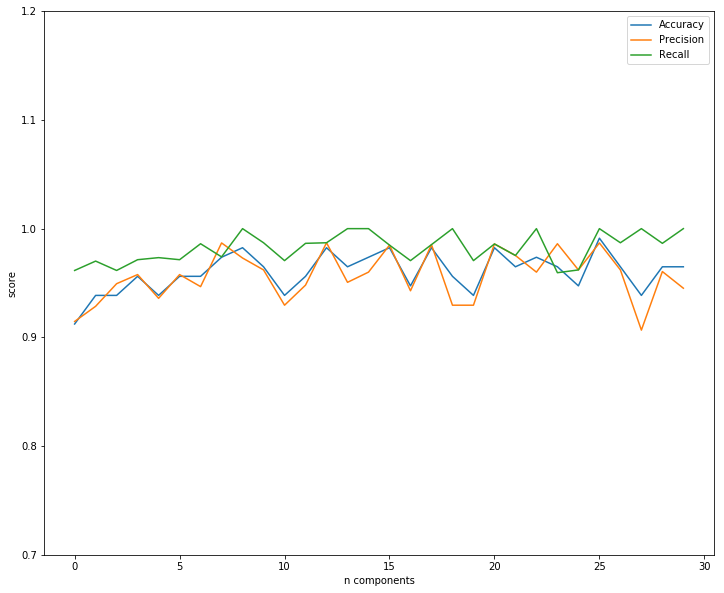

In [28]:
visualize_results(result_dict)